In [162]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy.stats import spearmanr


In [163]:
# Make global settings for the figures.
mpl.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams["mathtext.default"] = 'regular'
mpl.rcParams['pdf.fonttype'] = 42
# This is for using seaborn
sns.set_theme(style="white")
sns.set_style('ticks')
# File Paths
save_path = '../figures/'
data_path = "../data_files/data.xlsx"


# QIAKONG

In [164]:
# import data into a pandas dataframe.
qia = pd.read_excel(data_path, sheet_name="QIA")
qia.head(1)

,Corg_pos,Corg,Corg_5pt,d34S_pos,d34S_avg,d34S_1sd,d18O_avg,d18O_1sd,d18O_pos,d34S2,d34Spy_pos,d34Spy,d34Spy_1sd,Delta_S,Sr_pos,Sr,Mn,Ccarb_pos,C_carb
0,1.4,-29.38328,-28.71189,1.4,31.839221,0.599146,16.588986,0.51,1.4,31.785932,4.1,-12.196074,0.270044,43.982005,0.1,831.1,421.8,0.1,-2.14


In [165]:
def clean_data(df, *args):
    """
    This function takes a dataframe (df), extracts any number 
    of columns from it (*args) and then copies the data from those columns 
    as well as remove any empty rows. it returns the extracted columns as a 
    new dataframe free of rows with empty data.
    """
    out = df[[*args]].copy().dropna()
    return out


In [166]:
#d18O
d18O_df = clean_data(qia, 'd18O_pos', 'd18O_avg', 'd18O_1sd')
d18O = d18O_df['d18O_avg']
pos_d18O = d18O_df['d18O_pos']
d18O_err = d18O_df['d18O_1sd']

pos_Sr = qia.Sr_pos
Mn_Sr = qia.Mn/qia.Sr

# C_org
corg_df = clean_data(qia, 'Corg', 'Corg_pos')
corg = corg_df['Corg']
pos_corg = corg_df['Corg_pos']

#C_carb
ccarb_df = clean_data(qia,'Ccarb_pos', 'C_carb')
ccarb = ccarb_df['C_carb']
pos_ccarb = ccarb_df['Ccarb_pos']

# d34S
d34S_df = clean_data(qia,'d34S_avg', 'd34S_pos', 'd34S_1sd')
d34S = d34S_df.d34S_avg
pos_d34S = d34S_df.d34S_pos
d34S_err = d34S_df.d34S_1sd

# d34Spy
py_df = clean_data(qia,'d34Spy_pos', 'd34Spy', 'd34Spy_1sd')
d34Spy = py_df['d34Spy']
pos_d34Spy = py_df['d34Spy_pos']
d34Spy_err = py_df['d34Spy_1sd']

# Delta-S
DS_df = qia[["Delta_S",'d34Spy_pos']].copy().dropna()
CAS_pyr = DS_df.Delta_S
pos_CAS_pyr = DS_df['d34Spy_pos']

In [167]:
# Covariation
D_pyr_corr, p_value = spearmanr(qia.Delta_S, qia.d34Spy, nan_policy='omit')
# D_pyr_corr, p_value
d34S_Spy_corr, p_value = spearmanr(qia.d34S_avg, qia.d34Spy, nan_policy='omit')
d34S_DS_corr, p_value = spearmanr(qia.d34S_avg, qia.Delta_S, nan_policy='omit')
# d34S_Spy_corr, p_value
d34S_DS_corr, p_value


(0.2857142857142857, 0.34400021825867)

In [168]:
label_Corg = r'$\delta^{13}C_{org}\;(‰\;VPDB)$'
label_Ccarb = r'$\delta^{13}C_{carb}\;(‰\;VPDB)$'
label_d34S = r'$\delta^{34}S_{CAS}\;(‰\;VCDT)$'
label_d18O = r'$\delta^{18}O_{CAS}\;(‰\;SMOW)$'
label_d34Spy = r'$\delta^{34}S_{CRS}\;(‰\;VCDT)$'
label_d13Ccarb = r'$\delta^{13}C_{carb}\;(‰\;VPDB)$'
label_MnSr = r'$Mn/Sr$'
label_CAS_pyr = r'$\Delta^{34}S_{CAS-CRS}\;(‰)$'

In [169]:
def plot_smoothed_with_ci(x_data, y_data, ax, color, it=5, frac=0.3, is_sorted=True):

    # Fit lowess smoother
    smoothed_data = lowess(x_data, y_data, it=it, frac=frac, is_sorted=True)

    # Calculate residuals
    residuals = x_data - smoothed_data[:, 1]

    """# Calculate degrees of freedom
    dof = len(residuals) - 1

    # Calculate mean squared error (MSE)
    mse = np.sum(residuals**2) / dof"""

    # Calculate standard error of residuals
    # se = np.sqrt(mse)
    se = np.std(residuals)
    z_score = 1.96  # For a 95% confidence interval

    # Calculate margin of error
    margin_of_error = z_score * se

    # Calculate confidence interval
    lower_bound = smoothed_data[:, 1] - margin_of_error
    upper_bound = smoothed_data[:, 1] + margin_of_error

    # Plot the smoothed values with confidence interval
    ax.plot(smoothed_data[:, 1], smoothed_data[:, 0], c=color, linewidth=3.5, alpha=0.8)
    ax.fill_betweenx(smoothed_data[:, 0], lower_bound, upper_bound, color=color, alpha=0.1)
    
    
# plot_smoothed_with_ci(d34S, pos_d34S, ax0, color, it, frac)

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


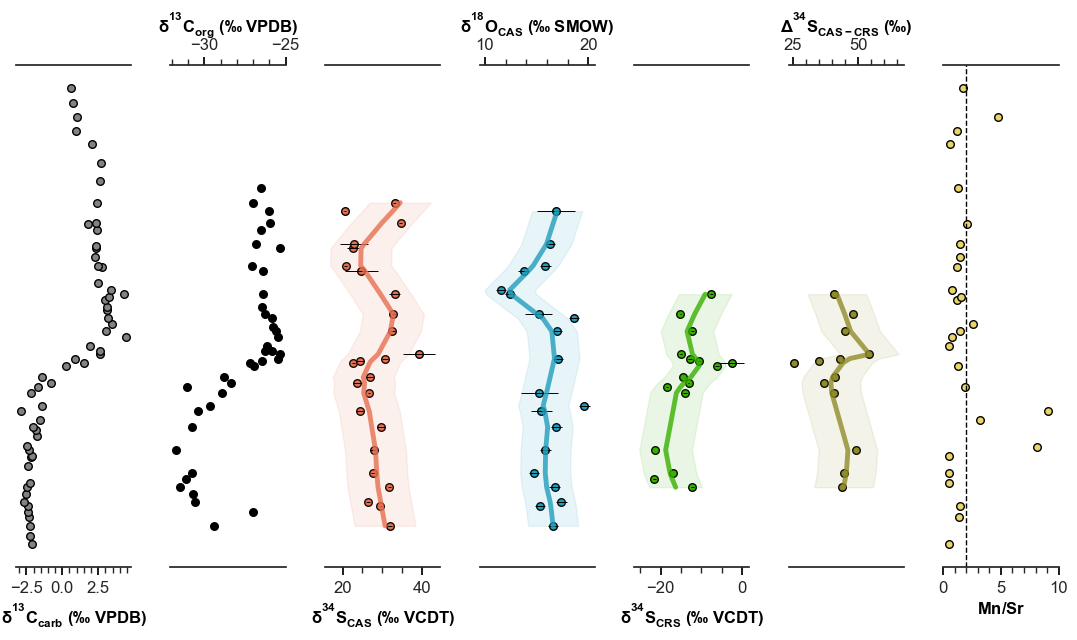

In [170]:
# Create figure and subplots within the figure.
fig, axes = plt.subplots(figsize=(11, 5.65),  # constrained_layout=True,
                         ncols=7, nrows=1, sharey=True)
ax0, ax1, ax2, ax3, ax4, ax5, ax6 = axes
axes_ = [ax0,ax1,ax2,ax3, ax4, ax5, ax6]

x_axis = [ccarb, corg, d34S, d18O, d34Spy, CAS_pyr, Mn_Sr]
y_axis = [pos_ccarb, pos_corg, pos_d34S,
          pos_d18O, pos_d34Spy, pos_d34Spy, pos_Sr]
labels = [label_Ccarb, label_Corg, label_d34S, label_d18O, label_d34Spy, label_CAS_pyr, label_MnSr]
color = ["#838383", 'black', "#e76f51",
         "#219ebc", "#38b000", "#908C29", "#E9D66B"]

x_error = [d34S_err, d18O_err, d34Spy_err]
err_axes = [ax2, ax3, ax4]

# remove the y-axis ticks and y-axis itself.
sns.despine(left=True, right=True, top=False, bottom=False)
plt.yticks([])
plt.tight_layout()

def scatter_plot(data, f_size):
    for i in range(len(axes_)):
        sns.scatterplot(data = data,x=x_axis[i], y=y_axis[i], ax=axes_[i],
                        color=color[i], legend=False, edgecolor='black',
                        s=30, linewidth=1,
                        )
        axes_[i].tick_params(labelsize=f_size, color= "black")
        axes_[i].set_xlabel(labels[i], fontsize=f_size,
                              c="black", fontweight="bold")
        axes_[i].minorticks_on()
        # Set the x-axis position based on the subplot index
        if i % 2 == 0:
            axes_[i].xaxis.set_ticks_position('bottom')  # x-axis at the bottom
            axes_[i].xaxis.set_label_position('bottom')  # x-axis at the bottom
        else:
            axes_[i].xaxis.set_ticks_position('top')  # x-axis at the top
            axes_[i].xaxis.set_label_position('top')  # x-axis at the top

# plot error bars.
def error_bar():
    for i in range(len(x_error)):
        err_axes[i].errorbar(xerr=x_error[i], x=x_axis[i+2], y=y_axis[i+2],
                            ecolor="black", color="black",
                            linestyle='none', elinewidth=0.7, capthick=0.5, mec='black')


scatter_plot(qia, 12)
error_bar()
ax6.set_xlim(0, 10)
# ax5.set_xlim(33, 56)
ax6.axvline(x=2, linestyle='dashed', color='black', linewidth=1)

plot_smoothed_with_ci(d34S, pos_d34S, ax2, color=color[2], it=5, frac=0.3)
plot_smoothed_with_ci(d18O, pos_d18O, ax3, color=color[3], it=5, frac=0.3)
plot_smoothed_with_ci(d34Spy, pos_d34Spy, ax4, color=color[4], it=5, frac=0.5)
plot_smoothed_with_ci(CAS_pyr,pos_CAS_pyr,ax5,color=color[5], it=5, frac=0.5)

plt.savefig(f"{save_path}qiakong.pdf", dpi=600)


# Jebel Aweri

In [171]:
ja = pd.read_excel(data_path, sheet_name="JA")
# ja.head(3)

In [172]:
# d34S
d34S_df = clean_data(ja,'d34S_avg', 'd34S_pos', 'd34S_1sd')
d34S = d34S_df.d34S_avg
pos_d34S = d34S_df.d34S_pos
d34S_err = d34S_df.d34S_1sd

#d18O
d18O_df = clean_data(ja, 'd18O_pos', 'd18O_avg', 'd18O_1sd')
d18O = d18O_df['d18O_avg']
pos_d18O = d18O_df['d18O_pos']
d18O_err = d18O_df['d18O_1sd']

In [173]:
ccarb = ja.C_carb
pos_ccarb = ja.Ccarb_pos
corg = ja.Corg
pos_corg = ja.Corg_pos

pos_Sr = ja.Sr_pos
Mn_Sr = ja.Mn/ja.Sr
pos_Sriso = ja.Sr_iso_pos
Sriso = ja.Sr_iso

color = ["#838383",'black', "#e76f51", "#219ebc", "#E9D66B"]

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


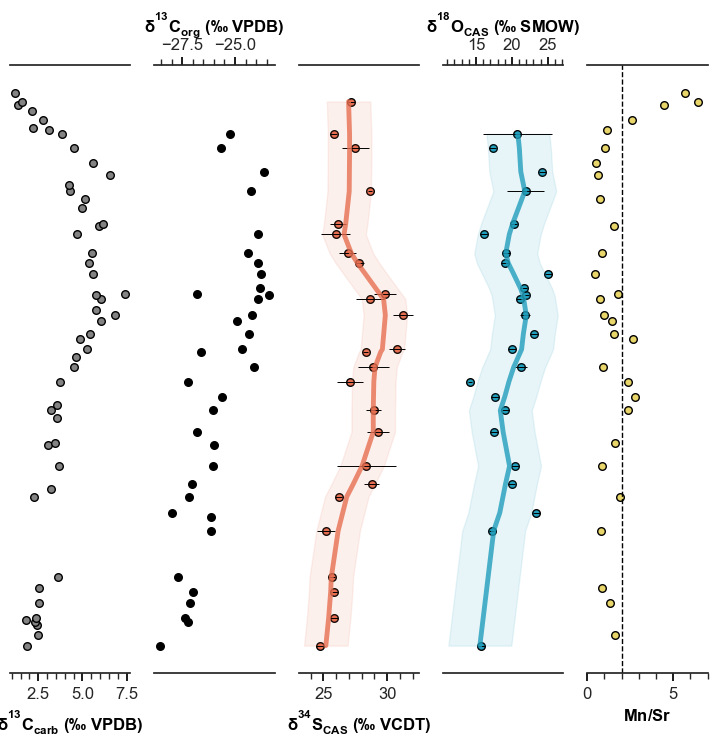

In [174]:
# Create figure and subplots within the figure.
fig, axes = plt.subplots(figsize=(9, 7.9),  # constrained_layout=True,
                         ncols=5, nrows=1, sharey=True)
ax0, ax1, ax2, ax3, ax4 = axes
axes_ = [ax0, ax1, ax2, ax3, ax4]

x_axis = [ccarb, corg, d34S, d18O, Mn_Sr]
y_axis = [pos_ccarb, pos_corg, pos_d34S, pos_d18O, pos_Sr]
labels = [label_Ccarb, label_Corg, label_d34S, label_d18O, label_MnSr]

x_error = [d34S_err, d18O_err]
err_axes = [ax2, ax3]

# remove the y-axis ticks and y-axis itself.
sns.despine(left=True, right=True, top=False, bottom=False)
plt.yticks([])

scatter_plot(ja, 12)
error_bar()
ax4.set_xlim(0,7)
ax4.axvline(x=2, linewidth=1, color='black', linestyle='--')

plot_smoothed_with_ci(d34S, pos_d34S, ax2, color=color[2], it=5, frac=0.3)
plot_smoothed_with_ci(d18O, pos_d18O, ax3, color=color[3], it=5, frac=0.3)

plt.savefig(f"{save_path}JA.pdf", dpi=600)


# Wadi Musjah

In [175]:
wmj = pd.read_excel(data_path, sheet_name="WMJ")
wmj.head(3)

,d34S_pos,d34S_avg,d34S_1sd,d34S_5pt,CAS_conc,d18O_pos,d18O_avg,d18O_1sd,Corg_pos,Corg,...,C_carb,Sr_pos,Sr,Mn,Unnamed: 15,Sr_iso,Sr_iso_pos,Unnamed: 18,Ce_anom,Ce_pos
0,0.09,21.949101,0.3,21.913883,714.0,0.09,14.554073,0.51,0.09,-27.640957,...,0.719940,0.40,68.4,162.3,NaN,0.707835,0.09,NaN,0.240000,0.09
1,0.71,23.750000,0.3,24.200300,49.0,0.71,14.794042,0.51,0.40,-23.601448,...,0.590869,1.10,113.1,163.9,NaN,0.707880,0.40,NaN,0.867186,0.40
2,0.95,26.470000,0.3,24.897674,49.0,0.95,19.581747,0.51,0.71,-26.710933,...,-0.394212,1.85,107.2,115.0,NaN,0.707835,0.88,NaN,0.747583,0.88


In [176]:
# d34S
d34S_df = clean_data(wmj,'d34S_avg', 'd34S_pos', 'd34S_1sd')
d34S = d34S_df.d34S_avg
pos_d34S = d34S_df.d34S_pos
d34S_err = d34S_df.d34S_1sd

#d18O
d18O_df = clean_data(wmj, 'd18O_pos', 'd18O_avg', 'd18O_1sd')
d18O = d18O_df['d18O_avg']
pos_d18O = d18O_df['d18O_pos']
d18O_err = d18O_df['d18O_1sd']

#Sr_iso
Sr_iso_df = clean_data(wmj, 'Sr_iso_pos', 'Sr_iso')
Sriso = Sr_iso_df['Sr_iso']
pos_Sriso = Sr_iso_df['Sr_iso_pos']

#Ce
Ce_df = clean_data(wmj, 'Ce_pos', 'Ce_anom')
Ce = Ce_df['Ce_anom']
pos_Ce = Ce_df['Ce_pos']

In [177]:
ccarb = wmj.C_carb
pos_ccarb = wmj.Ccarb_pos

pos_Sr = wmj.Sr_pos
Mn_Sr = wmj.Mn/wmj.Sr
corg = wmj.Corg
pos_corg = wmj.Corg_pos


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


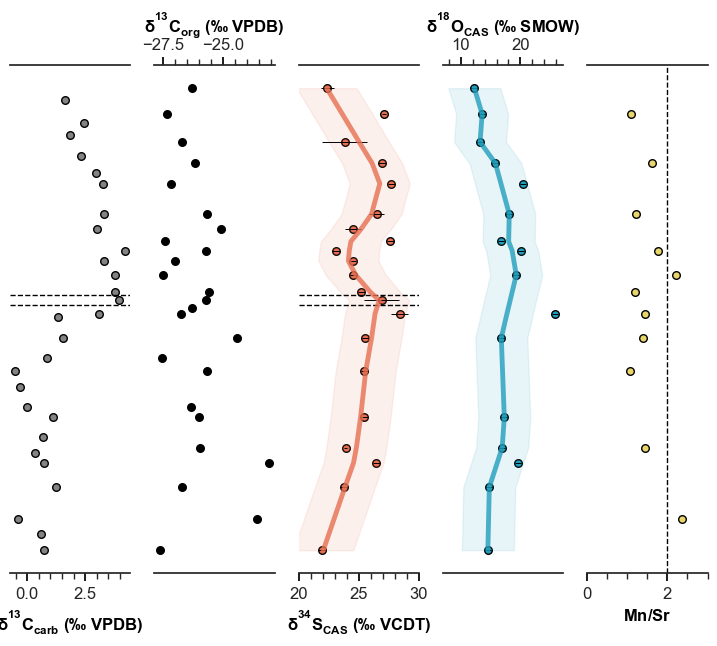

In [178]:
# Create figure and subplots within the figure.
fig, axes = plt.subplots(figsize=(9, 6.6),  # constrained_layout=True,
                         ncols=5, nrows=1, sharey=True)
ax0, ax1, ax2, ax3, ax4 = axes
axes_ = [ax0, ax1, ax2, ax3, ax4]

x_axis = [ccarb, corg, d34S, d18O, Mn_Sr]
y_axis = [pos_ccarb, pos_corg, pos_d34S, pos_d18O, pos_Sr]
labels = [label_Ccarb, label_Corg, label_d34S, label_d18O, label_MnSr]
x_error = [d34S_err, d18O_err]
err_axes = [ax2, ax3]

# remove the y-axis ticks and y-axis itself.
sns.despine(left=True, right=True, top=False, bottom=False)
plt.yticks([])

scatter_plot(wmj, 12)
error_bar()

ax2.set_xlim(20,30)
ax4.set_xlim(0,3)
ax4.axvline(x=2, linewidth=1, color='black', linestyle='--')
ax0.axhline(y=2.5, linewidth=1, color='black', linestyle='--')
ax0.axhline(y=2.6, linewidth=1, color='black', linestyle='--')
ax2.axhline(y=2.5, linewidth=1, color='black', linestyle='--')
ax2.axhline(y=2.6, linewidth=1, color='black', linestyle='--')

plot_smoothed_with_ci(d34S, pos_d34S, ax2, color=color[2], it=5, frac=0.3)
plot_smoothed_with_ci(d18O, pos_d18O, ax3, color=color[3], it=5, frac=0.3)

plt.savefig(f"{save_path}WMJ.pdf", dpi=600)
# np.savetxt('smoothed_wmj.txt', smoothed_d34S)

Sr_isotopes

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


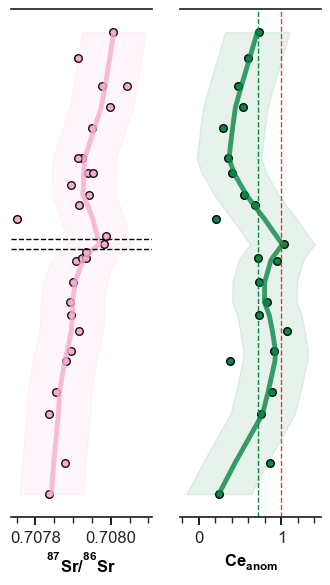

In [179]:
fig, axes = plt.subplots(figsize=(4, 6.6),  # constrained_layout=True,
                         ncols=2, nrows=1, sharey=True)
ax0, ax1 = axes
label_Sr = r'$^{87}Sr/^{86}Sr$'
label_Ce = r'$Ce_{anom}$'
f_size = 12
# remove the y-axis ticks and y-axis itself.
sns.despine(left=True, right=True, top=False, bottom=False)
plt.yticks([])

sns.scatterplot(x=Sriso, y=pos_Sriso, ax=ax0,
                color="#f7accf", legend=False, edgecolor='black',
                s=30, linewidth=1,
                )

sns.scatterplot(x=Ce, y=pos_Ce, ax=ax1,
                color="#0b8644", legend=False, edgecolor='black',
                s=30, linewidth=1,
                )

ax0.tick_params(labelsize=f_size, color="black")
ax0.set_xlabel(label_Sr, fontsize=f_size,
                    c="black", fontweight="bold")
ax1.tick_params(labelsize=f_size, color="black")
ax1.set_xlabel(label_Ce, fontsize=f_size,
                    c="black", fontweight="bold")
ax0.minorticks_on()
ax1.minorticks_on()

plot_smoothed_with_ci(Sriso, pos_Sriso, ax0, color="#f7accf", it=5, frac=0.3)
plot_smoothed_with_ci(Ce, pos_Ce, ax1, color="#0b8644", it=5, frac=0.3)

ax0.axhline(y=2.5, linewidth=1, color='black', linestyle='--')
ax0.axhline(y=2.6, linewidth=1, color='black', linestyle='--')
ax1.axvline(x=Ce.median(), linewidth=1, color="#0b8644", linestyle='--')
ax1.axvline(x=1, linewidth=1, color="#d84727", linestyle='--')

plt.savefig("../figures/WMJ_Sr.pdf", dpi=600)